In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import altair as alt
import pycountry_convert as pc

## Not needed

In [2]:
filepath=r'Datasets for IV\60dde6d7-en\QITS-2023-1-EN-20240216T090213.csv'
df=pd.read_csv(filepath)
df.head()

LOCATION Reporter country FLOW     Flow PARTNER Partner country FREQUENCY  \
0      AUS        Australia  EXP  Exports     AUT         Austria         A   
1      AUS        Australia  EXP  Exports     AUT         Austria         A   
2      AUS        Australia  EXP  Exports     AUT         Austria         A   
3      AUS        Australia  EXP  Exports     AUT         Austria         A   
4      AUS        Australia  EXP  Exports     AUT         Austria         A   

  Frequency  TIME  Time Unit Code       Unit  PowerCode Code PowerCode  \
0    Annual  2010  2010       USD  US Dollar               0     Units   
1    Annual  2011  2011       USD  US Dollar               0     Units   
2    Annual  2012  2012       USD  US Dollar               0     Units   
3    Annual  2013  2013       USD  US Dollar               0     Units   
4    Annual  2014  2014       USD  US Dollar               0     Units   

   Reference Period Code  Reference Period     Value  Flag Codes  Flags  
0                    NaN               NaN  62852134         NaN    NaN  
1                    NaN               NaN  73144918         NaN    NaN  
2                    NaN               NaN  71483059         NaN    NaN  
3                    NaN               NaN  67897422         NaN    NaN  
4                    NaN               NaN  61114752         NaN    NaN

# Data Cleaning

In [3]:
df.shape

(261252, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261252 entries, 0 to 261251
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LOCATION               261252 non-null  object 
 1   Reporter country       261252 non-null  object 
 2   FLOW                   261252 non-null  object 
 3   Flow                   261252 non-null  object 
 4   PARTNER                261252 non-null  object 
 5   Partner country        261252 non-null  object 
 6   FREQUENCY              261252 non-null  object 
 7   Frequency              261252 non-null  object 
 8   TIME                   261252 non-null  object 
 9   Time                   261252 non-null  object 
 10  Unit Code              261252 non-null  object 
 11  Unit                   261252 non-null  object 
 12  PowerCode Code         261252 non-null  int64  
 13  PowerCode              261252 non-null  object 
 14  Reference Period Code  0 non-null   

In [5]:
df.isna().sum()

LOCATION                      0
Reporter country              0
FLOW                          0
Flow                          0
PARTNER                       0
Partner country               0
FREQUENCY                     0
Frequency                     0
TIME                          0
Time                          0
Unit Code                     0
Unit                          0
PowerCode Code                0
PowerCode                     0
Reference Period Code    261252
Reference Period         261252
Value                         0
Flag Codes               261252
Flags                    261252
dtype: int64

In [6]:
df.nunique()

LOCATION                     46
Reporter country             46
FLOW                          2
Flow                          2
PARTNER                      50
Partner country              50
FREQUENCY                     2
Frequency                     2
TIME                         66
Time                         66
Unit Code                     1
Unit                          1
PowerCode Code                1
PowerCode                     1
Reference Period Code         0
Reference Period              0
Value                    260189
Flag Codes                    0
Flags                         0
dtype: int64

In [7]:
df.columns

Index(['LOCATION', 'Reporter country', 'FLOW', 'Flow', 'PARTNER',
       'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

## Process

In [8]:
df=df.drop(columns=['Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Flag Codes','Flags','FLOW','FREQUENCY','TIME'])

df.head()

LOCATION Reporter country     Flow PARTNER Partner country Frequency  Time  \
0      AUS        Australia  Exports     AUT         Austria    Annual  2010   
1      AUS        Australia  Exports     AUT         Austria    Annual  2011   
2      AUS        Australia  Exports     AUT         Austria    Annual  2012   
3      AUS        Australia  Exports     AUT         Austria    Annual  2013   
4      AUS        Australia  Exports     AUT         Austria    Annual  2014   

      Value  
0  62852134  
1  73144918  
2  71483059  
3  67897422  
4  61114752

In [9]:
df.replace('Korea','South Korea',inplace=True)
df.replace("China (People's Republic of)",'China',inplace=True)

In [11]:
df['Reporter Continent']=df['Reporter country'].apply(country_to_continent)
df['Partner Continent']=df['Partner country'].apply(country_to_continent)

c:\Users\Divya\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\Divya\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [12]:
report = ['European Union (27 countries)','European Union (28 countries)']
part = ['European Union (27 countries)','European Union (28 countries)','OECD - Total', 'G7', 'G20', 'World']

In [14]:
df.to_csv('Datasets for IV\modified_trade_data.csv',index=None)

# Analysis

In [2]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'Unknown'
    return country_continent_name

In [3]:
df=pd.read_csv(r'C:\Users\Divya\Downloads\Info Viz Project\Datasets for IV\modified_trade_data.csv')

In [4]:
grouped = df.groupby(df.Frequency)
df_annual = grouped.get_group("Annual")
df_quarter = grouped.get_group("Quarterly")

In [5]:
g1=df_annual.groupby(df_annual.Time)
date='2010'
flow='Exports'
df_annual_t=g1.get_group(date)
df_annual_plot = df_annual_t[df_annual_t['Flow']==flow]
df_annual_plot.head()

LOCATION Reporter country     Flow PARTNER Partner country Frequency  Time  \
0       AUS        Australia  Exports     AUT         Austria    Annual  2010   
13      AUS        Australia  Exports     BEL         Belgium    Annual  2010   
26      AUS        Australia  Exports     CAN          Canada    Annual  2010   
39      AUS        Australia  Exports     CZE         Czechia    Annual  2010   
52      AUS        Australia  Exports     DNK         Denmark    Annual  2010   

         Value Reporter Continent Partner Continent  
0     62852134            Oceania            Europe  
13  1144860917            Oceania            Europe  
26  1157739983            Oceania     North America  
39    77997941            Oceania            Europe  
52   135303886            Oceania            Europe

In [12]:
df_annual_plot['Value'].describe()

count    1.882000e+03
mean     2.313439e+10
std      1.117714e+11
min      1.400540e+05
25%      1.415567e+08
50%      8.888534e+08
75%      4.811833e+09
max      1.805997e+12
Name: Value, dtype: float64

In [13]:
v_left = 1157739983	
v_right = 5157739983	
df_annual_plot = df_annual_plot[(df_annual_plot['Value']>=v_left) & (df_annual_plot['Value']<=v_right)]

In [14]:
import matplotlib.cm
import numpy as np
def color_map(z):

    colors = np.zeros((np.size(z),3))  # Not needed.
    
    normalize=matplotlib.colors.Normalize(vmin=min(z),vmax=max(z))  # Normalize elevation values to float values between 0 and 1

    # Different custom color_palletes, help from coloors.co
    color_pallete_1=["#001524","#15616D","#FFECD1","#FF7D00","#FF7D00",'#78290F']  
    color_pallete_2=['#8ecae6','#219ebc','#023047','#ffb703','#fb8500']  # Best
    color_pallete_3=["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4","#90e0ef","#ade8f4","#caf0f8"] # bad
    color_pallete_4=["#006ba6","#0496ff","#ffbc42","#d81159","#8f2d56"] # bad
    color_pallete_5= ['#ee4266', '#2a1e5c', '#0a0f0d', '#c4cbca', '#3cbbb1']

    newcolormap=matplotlib.colors.LinearSegmentedColormap.from_list('edge_colormap',color_pallete_5) 
    mapper=matplotlib.cm.ScalarMappable(norm=normalize,cmap=newcolormap)  

    colors=mapper.to_rgba(z)
    return colors,mapper

In [15]:
G = nx.from_pandas_edgelist(df_annual_plot,
                            source='Reporter country',
                            target='Partner country',
                            edge_attr='Value',
                            create_using=nx.DiGraph)

In [16]:
COLOR_DIC = {'Oceania': '#0000FF',
            'Europe': '#A020F0' ,
            'North America': '#028900',
            'Asia': '#ee4035',
            'South America': '#e86af0',
            'Unknown': '#d6ccc2',
            'Africa': '#ffbf00'}

def continent_color(country):
    '''
    References:
     - https://www.sensationstation.net/uploads/1/1/2/2/112256989/color_by_continent.pdf
     - https://www.designpieces.com/palette/continental-ag-color-palette-hex-and-rgb/
    
    '''
    continent = country_to_continent(country)
    return COLOR_DIC[continent]

C:\Users\Divya\AppData\Local\Temp\ipykernel_6844\321287109.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper,shrink= 0.5)


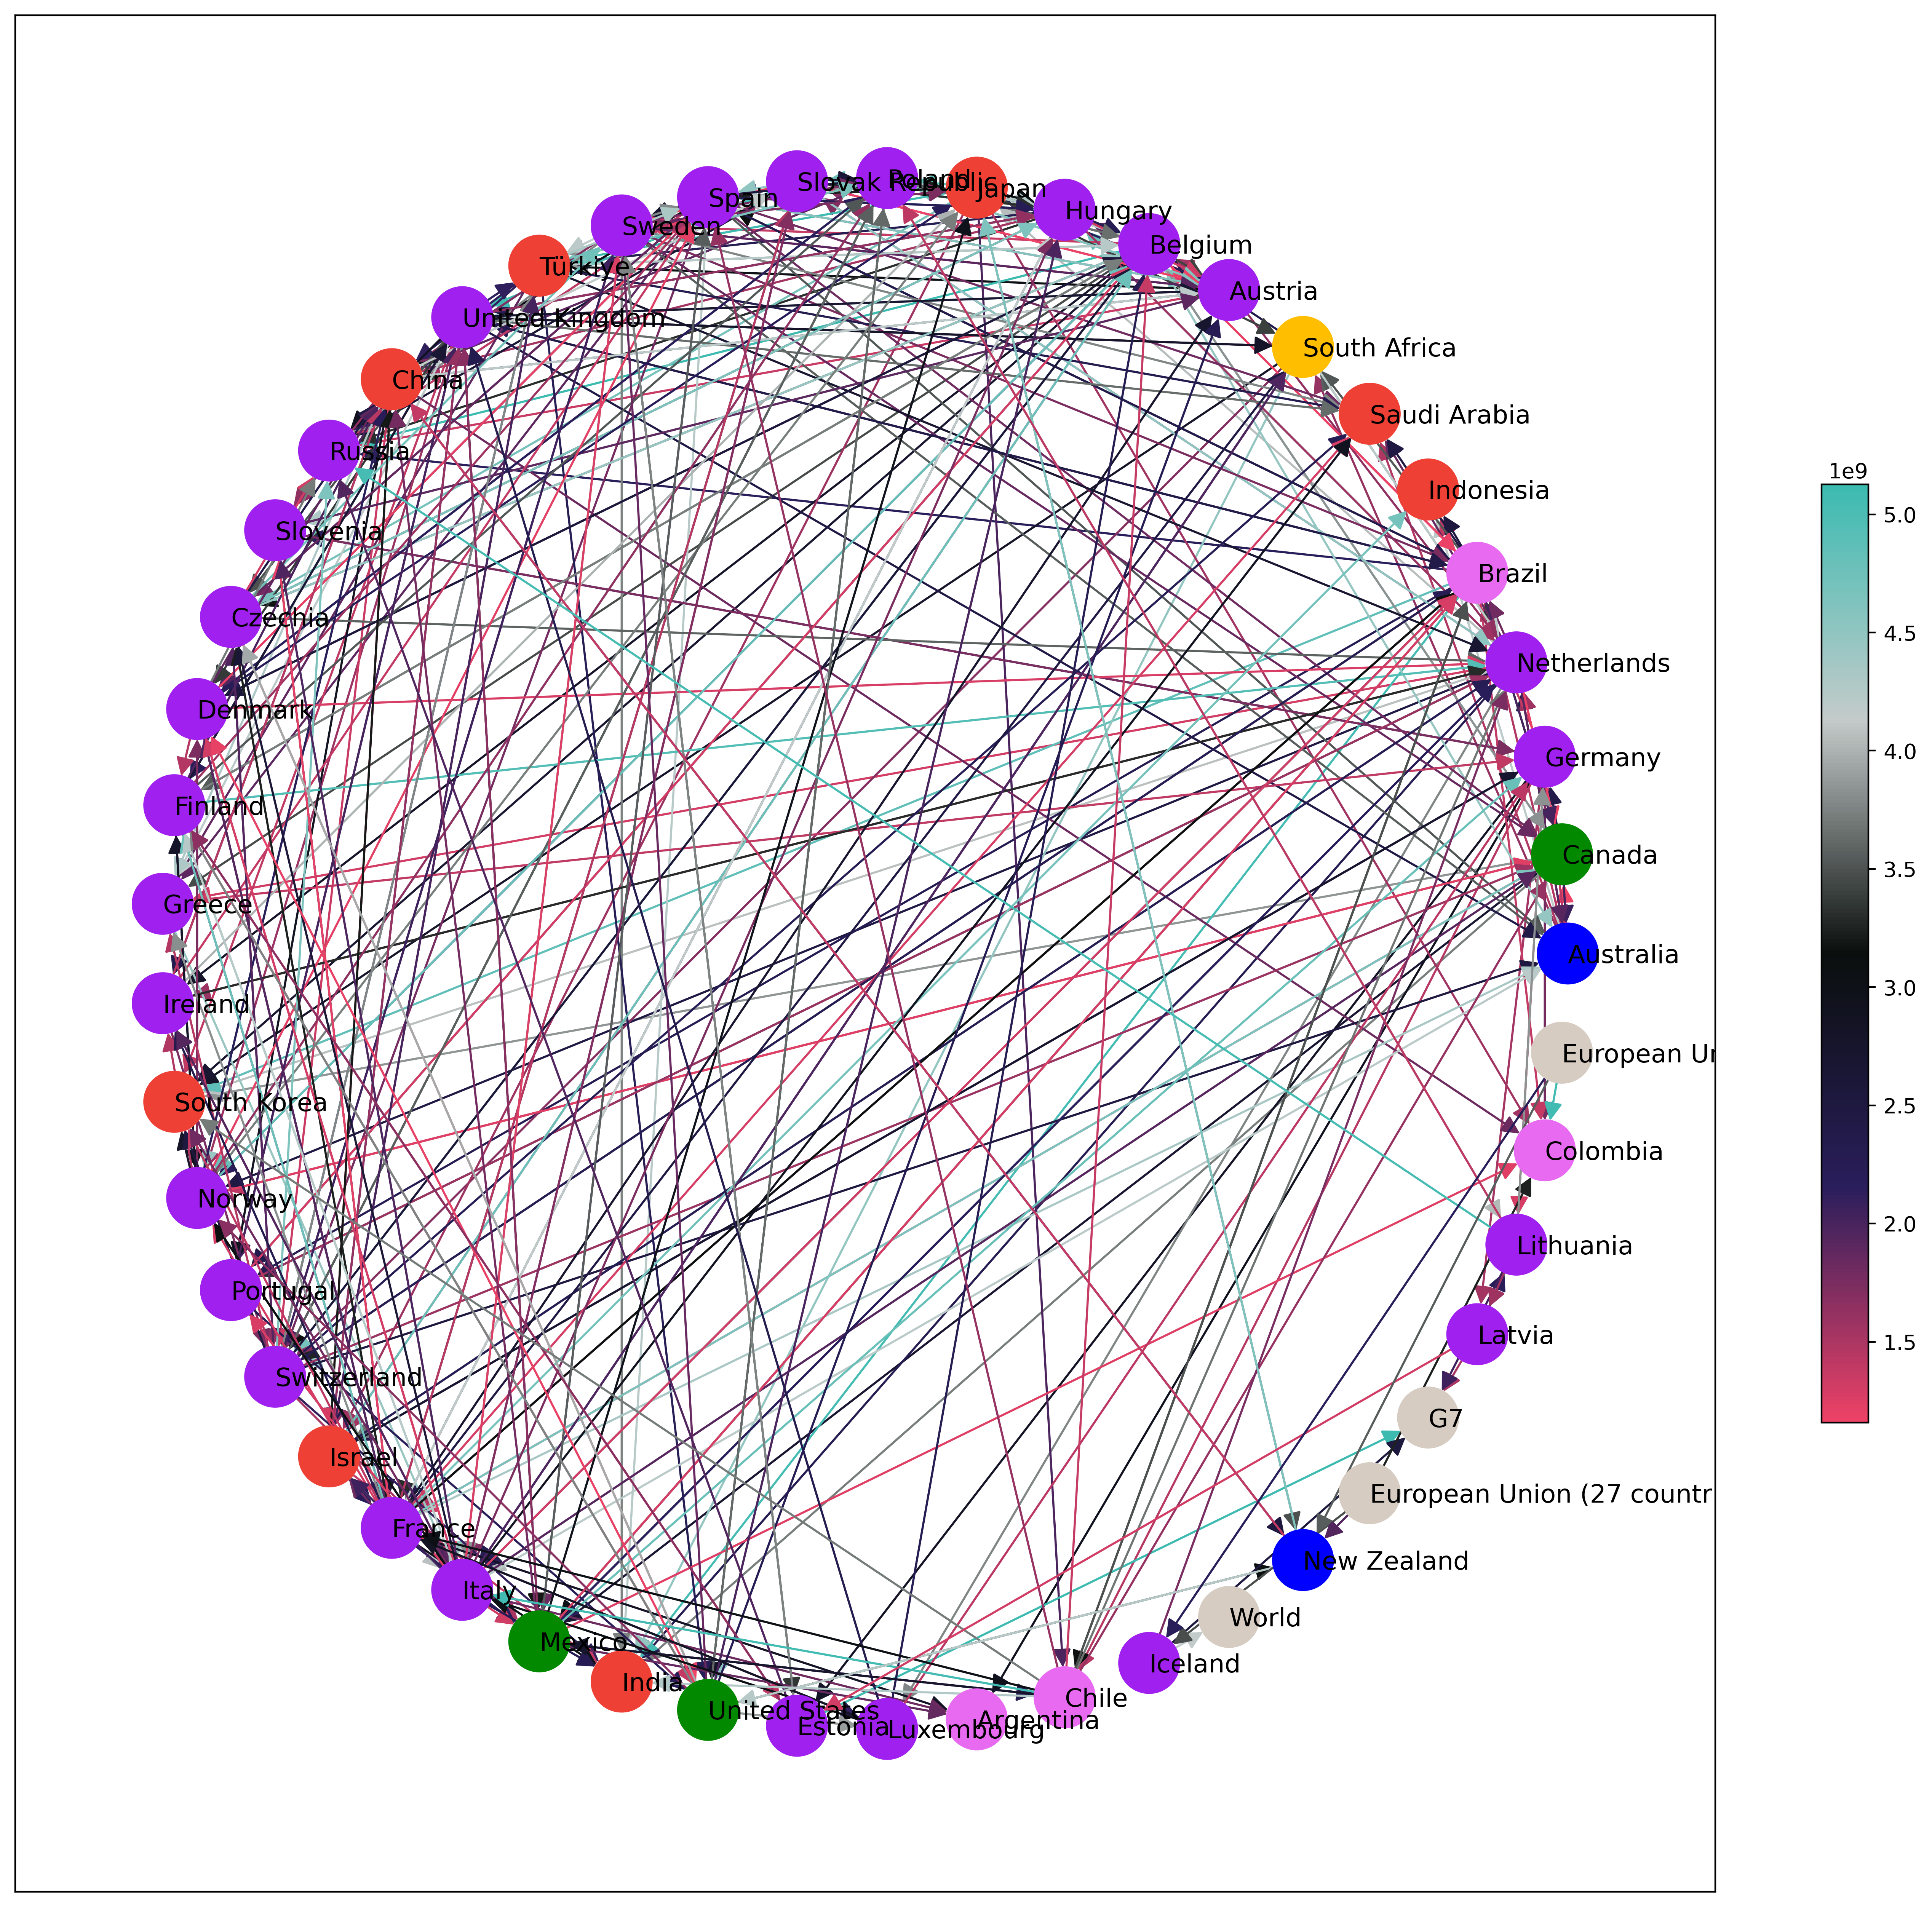

In [17]:
plt.figure(figsize = (18,16),dpi=400)
 
colors,mapper=color_map(df_annual_plot['Value'])
options = {
    'with_labels':False,
    'node_color': [continent_color(country) for country in list(G.nodes)] ,# color of node
    'node_size': 800,          # size of node
    'width': 1,                 # line width of edges
    'arrowsize': 18,            # size of arrow
    'edge_color':colors,        # edge color
    'label': ['Oceania', 'Europe', 'North America', 'Asia', 'South America','Unknown', 'Africa']
}

nx.draw_networkx(G, pos=nx.circular_layout(G),**options)

option_node_labels={'horizontalalignment' :'left',
                    'verticalalignment' :'center_baseline',
                    'clip_on':True
                    }

nx.draw_networkx_labels(G,pos=nx.circular_layout(G),**option_node_labels)

plt.colorbar(mapper,shrink= 0.5)
plt.savefig('testimg.pdf',format='pdf')
plt.show()


### References:
- https://geopandas.org/en/stable/gallery/plotting_basemap_background.html
- https://readmedium.com/en/visualizing-geospatial-network-graphs-using-basemap-and-mplleaflet-76a7f3d0c923
- https://readmedium.com/en/plotting-network-graphs-using-python-bc62f0d93b3f
- https://towardsdatascience.com/building-interactive-network-graphs-using-pyvis-5b8e6e25cf64
- https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
- https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx